#  introduction  to keras

In [1]:
from keras import layers
from keras import models

In [2]:
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

In [3]:
input_tensor=layers.Input(shape=(784,))
x=layers.Dense(32,activation='relu')(input_tensor)
output_tensor=layers.Dense(10,activation='softmax')(x)
model=models.Model(inputs=input_tensor,outputs=output_tensor)

# classification example


In [4]:
from keras.datasets import imdb

In [5]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])



9999

In [9]:
word_index=imdb.get_word_index()

In [10]:
reverse_word_index=dict(
    [(value,key) for (key ,value)in word_index.items()])
decoded_review=' '.join(
     [reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [11]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i , sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [12]:
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [14]:
from keras import models
from keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [16]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

c:\Users\moavia computer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [18]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

In [19]:
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [20]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 11s 307ms/step - loss: 0.5562 - acc: 0.7523 - val_loss: 0.4327 - val_acc: 0.8561
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3501 - acc: 0.8903 - val_loss: 0.3300 - val_acc: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2588 - acc: 0.9182 - val_loss: 0.2896 - val_acc: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2037 - acc: 0.9369 - val_loss: 0.2988 - val_acc: 0.8790
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1741 - acc: 0.9427 - val_loss: 0.2872 - val_acc: 0.8849
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1458 - acc: 0.9534 - val_loss: 0.3128 - val_acc: 0.8765
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1260 - acc: 0.9613 - val_loss: 0.3159 - val_acc: 0.8754
Epoch 8/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1090 -

In [21]:
history_dict=history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

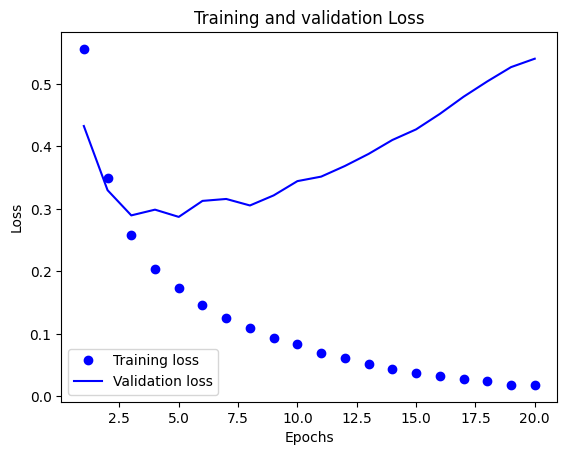

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1) # corrected line
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

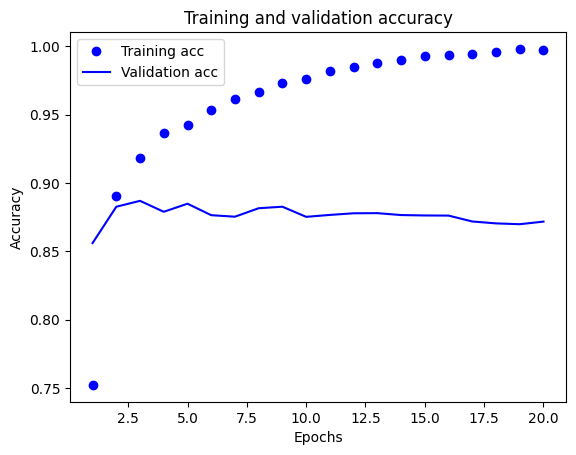

In [23]:


acc_value = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_value, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 3s 22ms/step - loss: 0.4564 - accuracy: 0.8182
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2689 - accuracy: 0.9056
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2136 - accuracy: 0.9215
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2959 - accuracy: 0.8825


In [25]:
results

[0.29590141773223877, 0.8825200200080872]

In [26]:
model.predict(x_test)

782/782 [==============================] - 4s 4ms/step


array([[0.27409363],
       [0.99987704],
       [0.8280165 ],
       ...,
       [0.14973322],
       [0.090716  ],
       [0.6844851 ]], dtype=float32)

# Classificatin example

In [27]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [28]:
len(train_data)


8982

In [29]:

 len(test_data)

2246

In [30]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [31]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [32]:
train_labels[10]

3

In [33]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [34]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [35]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [36]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [37]:
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])

In [38]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [39]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 61ms/step - loss: 2.8932 - accuracy: 0.4669 - val_loss: 1.9704 - val_accuracy: 0.5900
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.6416 - accuracy: 0.6656 - val_loss: 1.4482 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.2388 - accuracy: 0.7320 - val_loss: 1.2471 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 1.0083 - accuracy: 0.7839 - val_loss: 1.1413 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8444 - accuracy: 0.8200 - val_loss: 1.0428 - val_accuracy: 0.7730
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.7050 - accuracy: 0.8509 - val_loss: 0.9756 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 1s 55ms/step - loss: 0.5913 - accuracy: 0.8746 - val_loss: 0.9310 - val_accuracy: 0.8070
Epoch 8/20
16

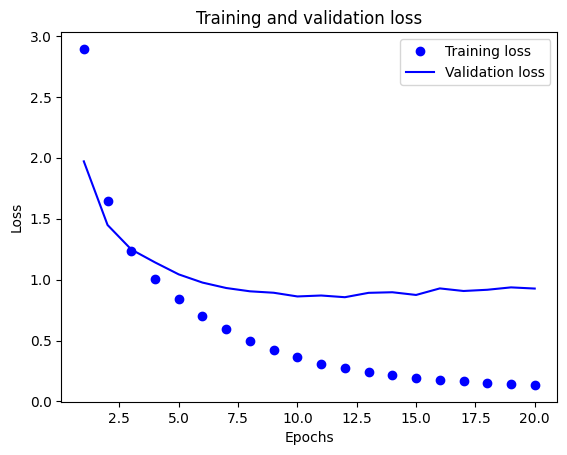

In [40]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

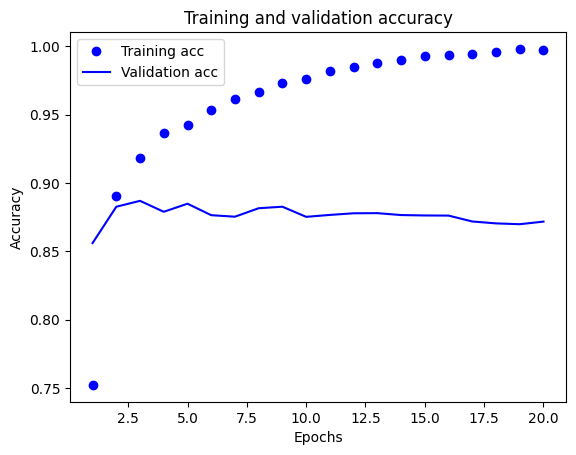

In [41]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 55ms/step - loss: 2.7078 - accuracy: 0.4875 - val_loss: 1.8266 - val_accuracy: 0.6110
Epoch 2/9
16/16 [==============================] - 1s 42ms/step - loss: 1.5438 - accuracy: 0.6739 - val_loss: 1.3747 - val_accuracy: 0.6910
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.1772 - accuracy: 0.7399 - val_loss: 1.1662 - val_accuracy: 0.7430
Epoch 4/9
16/16 [==============================] - 1s 75ms/step - loss: 0.9585 - accuracy: 0.7950 - val_loss: 1.0529 - val_accuracy: 0.7650
Epoch 5/9
16/16 [==============================] - 1s 60ms/step - loss: 0.7926 - accuracy: 0.8290 - val_loss: 0.9795 - val_accuracy: 0.7850
Epoch 6/9
16/16 [==============================] - 1s 59ms/step - loss: 0.6594 - accuracy: 0.8592 - val_loss: 0.9253 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 1s 53ms/step - loss: 0.5503 - accuracy: 0.8859 - val_loss: 0.8755 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [43]:
results

[0.9333072304725647, 0.7827248573303223]

In [44]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19145146927871773

In [45]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [46]:
predictions[0].shape

(46,)

In [47]:
np.sum(predictions[0])

0.9999999

In [48]:
np.argmax(predictions[0])

4

In [49]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [50]:
model.compile(optimizer='rmsprop',

loss='sparse_categorical_crossentropy',
metrics=['acc'])

In [51]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',

loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 25ms/step - loss: 3.5269 - accuracy: 0.0525 - val_loss: 3.1683 - val_accuracy: 0.0520
Epoch 2/20
63/63 [==============================] - 1s 22ms/step - loss: 2.7049 - accuracy: 0.1911 - val_loss: 2.2007 - val_accuracy: 0.5910
Epoch 3/20
63/63 [==============================] - 1s 22ms/step - loss: 1.7748 - accuracy: 0.6289 - val_loss: 1.5958 - val_accuracy: 0.6240
Epoch 4/20
63/63 [==============================] - 1s 22ms/step - loss: 1.3805 - accuracy: 0.6654 - val_loss: 1.4214 - val_accuracy: 0.6630
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.1961 - accuracy: 0.7060 - val_loss: 1.3351 - val_accuracy: 0.6860
Epoch 6/20
63/63 [==============================] - 2s 26ms/step - loss: 1.0698 - accuracy: 0.7342 - val_loss: 1.2963 - val_accuracy: 0.7000
Epoch 7/20
63/63 [==============================] - 1s 22ms/step - loss: 0.9805 - accuracy: 0.7691 - val_loss: 1.2863 - val_accuracy: 0.7060
Epoch 8/20
63

# predicting House :Regression Example

In [52]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

In [53]:
train_data.shape

(404, 13)

In [54]:
test_data.shape


(102, 13)

In [55]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [56]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [57]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [58]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [59]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
all_scores

[2.0764925479888916,
 2.7417690753936768,
 3.1697964668273926,
 2.5254461765289307]

In [ ]:
np.mean(all_scores)

2.628376066684723

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

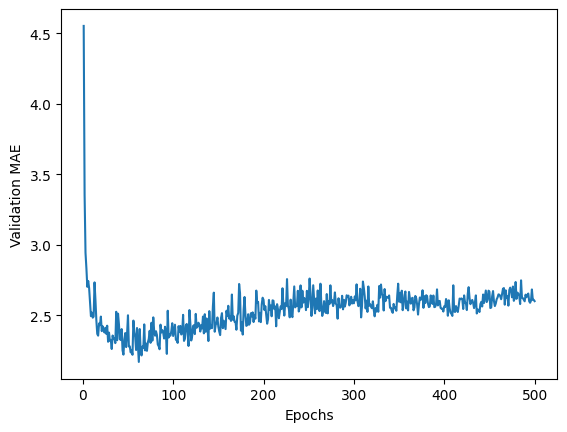

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

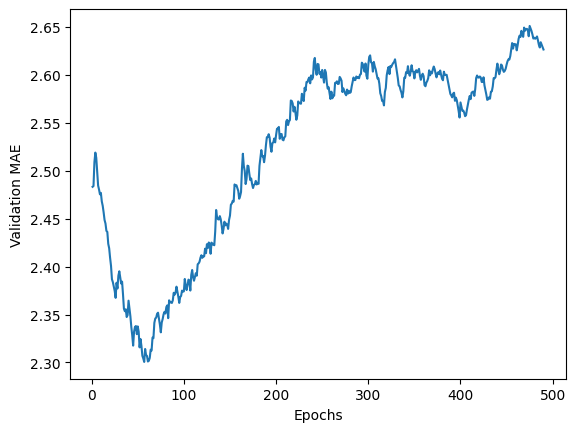

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
                smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.6598 - mae: 2.8055


In [ ]:
test_mae_score

2.8054516315460205